In [43]:
import alpaca_trade_api as tradeapi
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [44]:
api = tradeapi.REST('APIKEY',
                    'SECRETCODE', 
                    'https://paper-api.alpaca.markets')

In [46]:
def get_bars(symbol):
    
    data = api.get_barset(symbol, 'day', limit=1000)
    data = data.df[symbol]['close']

    return data

In [58]:
def correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1).fillna(0)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = df.corr().sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [70]:
api.submit_order('SNAP', 100, 'buy', 'market', 'day')
api.submit_order('SLV', 100, 'buy', 'market', 'day')
api.submit_order('JNJ', 100, 'buy', 'market', 'day')
api.submit_order('AAPL', 10, 'buy', 'market', 'day')
api.submit_order('GLD', 100, 'buy', 'market', 'day')
api.submit_order('GOOG', 1, 'buy', 'market', 'day')
api.submit_order('CAT', 100, 'buy', 'market', 'day')
api.submit_order('EWZ', 10, 'buy', 'market', 'day')

In [71]:
pos_list = [x.symbol for x in api.list_positions()]

In [72]:
df = correlation(pos_list)

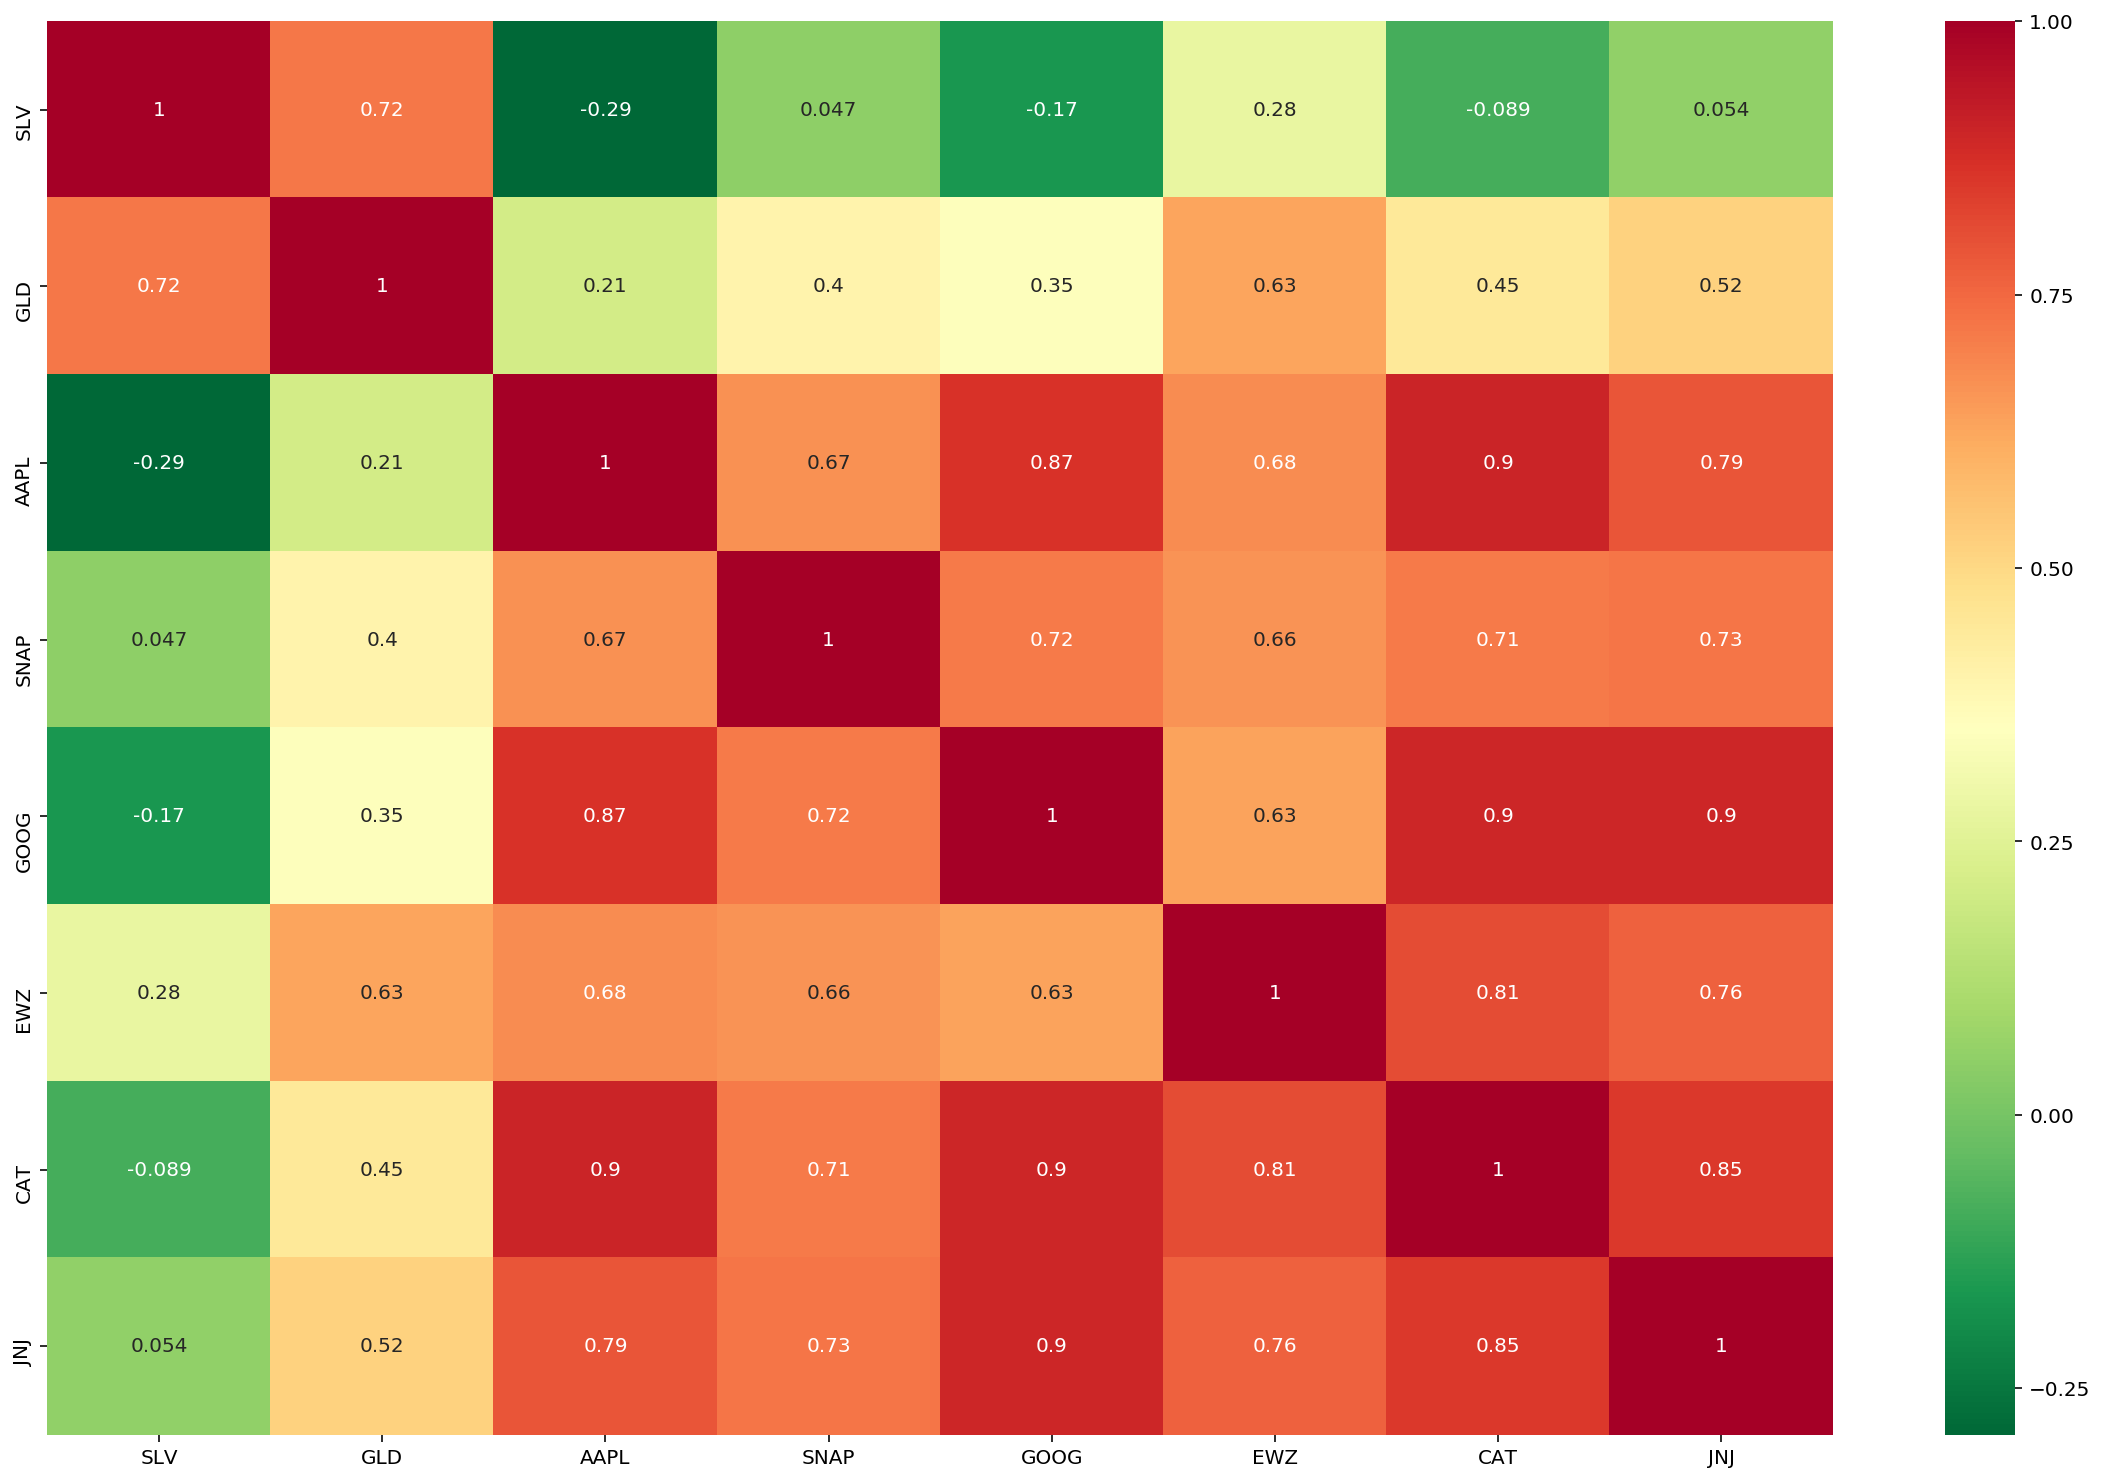

In [73]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(20,13))
sns.heatmap(
    df,
    annot=True,
    cmap="RdYlGn_r"
);